# 转置卷积（Transpose Convolution）

转置卷积，也被称为反卷积（Deconvolution）、上采样卷积（Up-sampling Convolution）或分数步长卷积（Fractionally Strided Convolution），是深度学习中常用的一种操作，用于将低分辨率的特征图映射到高分辨率的输出。它在图像生成、分割、语义分割等任务中广泛应用。

## 转置卷积操作原理

转置卷积的操作原理与标准卷积相反。在标准卷积中，输入特征图通过滤波器（卷积核）的滑动窗口进行降采样，得到较小的输出特征图。而在转置卷积中，输入特征图的每个元素都与滤波器进行加权，但是它的目标是通过反向操作来实现上采样，即将输入特征图的尺寸扩大，通常使用零填充来实现这一点。

具体步骤如下：
1. 输入特征图上的每个像素值与滤波器的权重相乘。
2. 对输出进行零填充，以扩大输出特征图的尺寸。
3. 对扩大后的输出特征图应用标准卷积操作，通常称为“valid卷积”，以获得最终的转置卷积结果。

## 转置卷积的应用

### 1. 图像生成

转置卷积在生成对抗网络（GANs）中常用于从随机噪声生成高分辨率图像。通过反向传播误差信号，网络可以逐渐生成越来越逼真的图像。

### 2. 语义分割

在语义分割任务中，转置卷积可以将低分辨率的特征图映射回原始图像尺寸，从而生成像素级别的语义分割结果。

### 3. 物体检测

在一些物体检测模型中，特征金字塔网络使用转置卷积来合并不同尺度的特征图，以便检测不同大小的物体。

## 转置卷积的参数

转置卷积的关键参数包括卷积核大小、步幅（stride）、填充（padding）、输出通道数等，它们决定了输出特征图的尺寸和内容。通常，卷积核的大小和步幅决定了上采样的倍数，而填充则影响了输出特征图的大小。

## 卷积的优化实现
- ### 一个常规的卷积操作：
  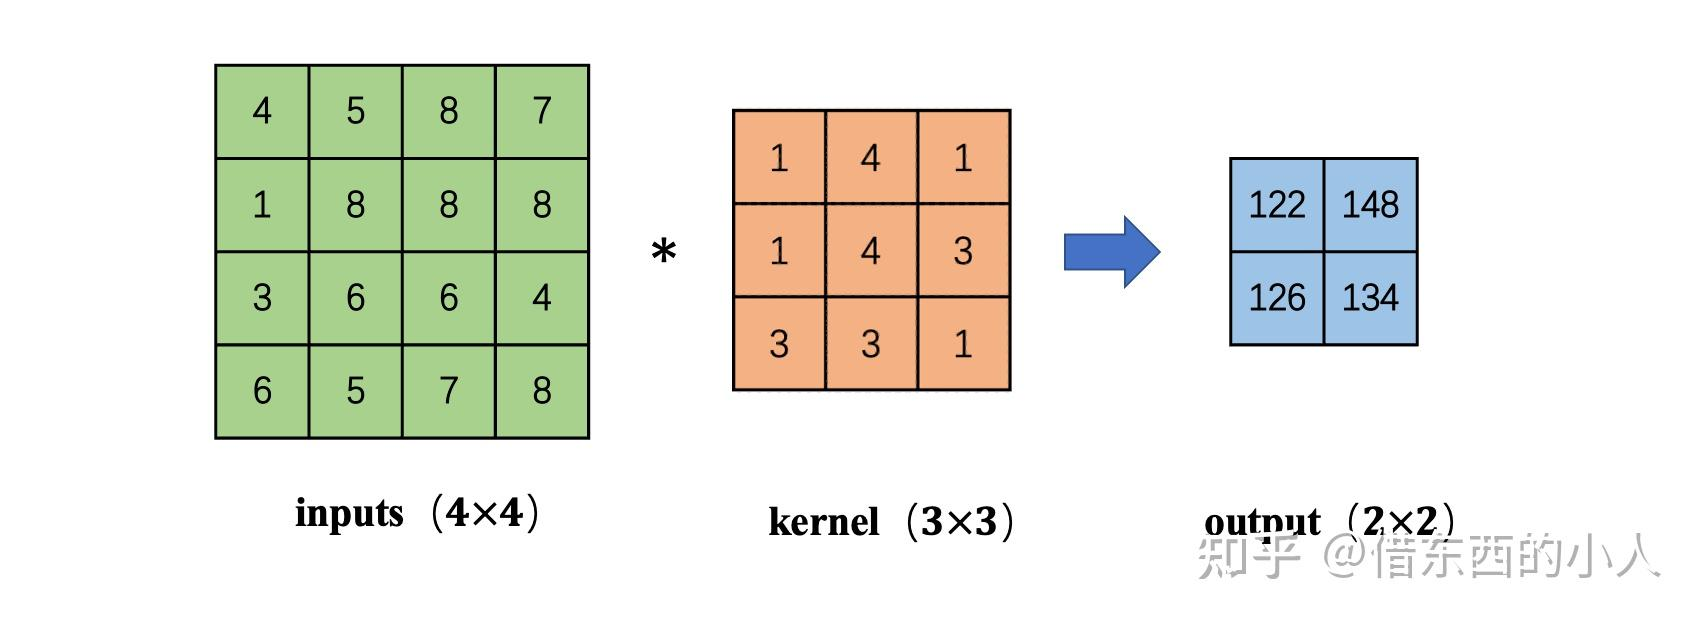
- ### 将卷积操作写成矩阵相乘的形式，将输出特征图的像素值按行展开：
  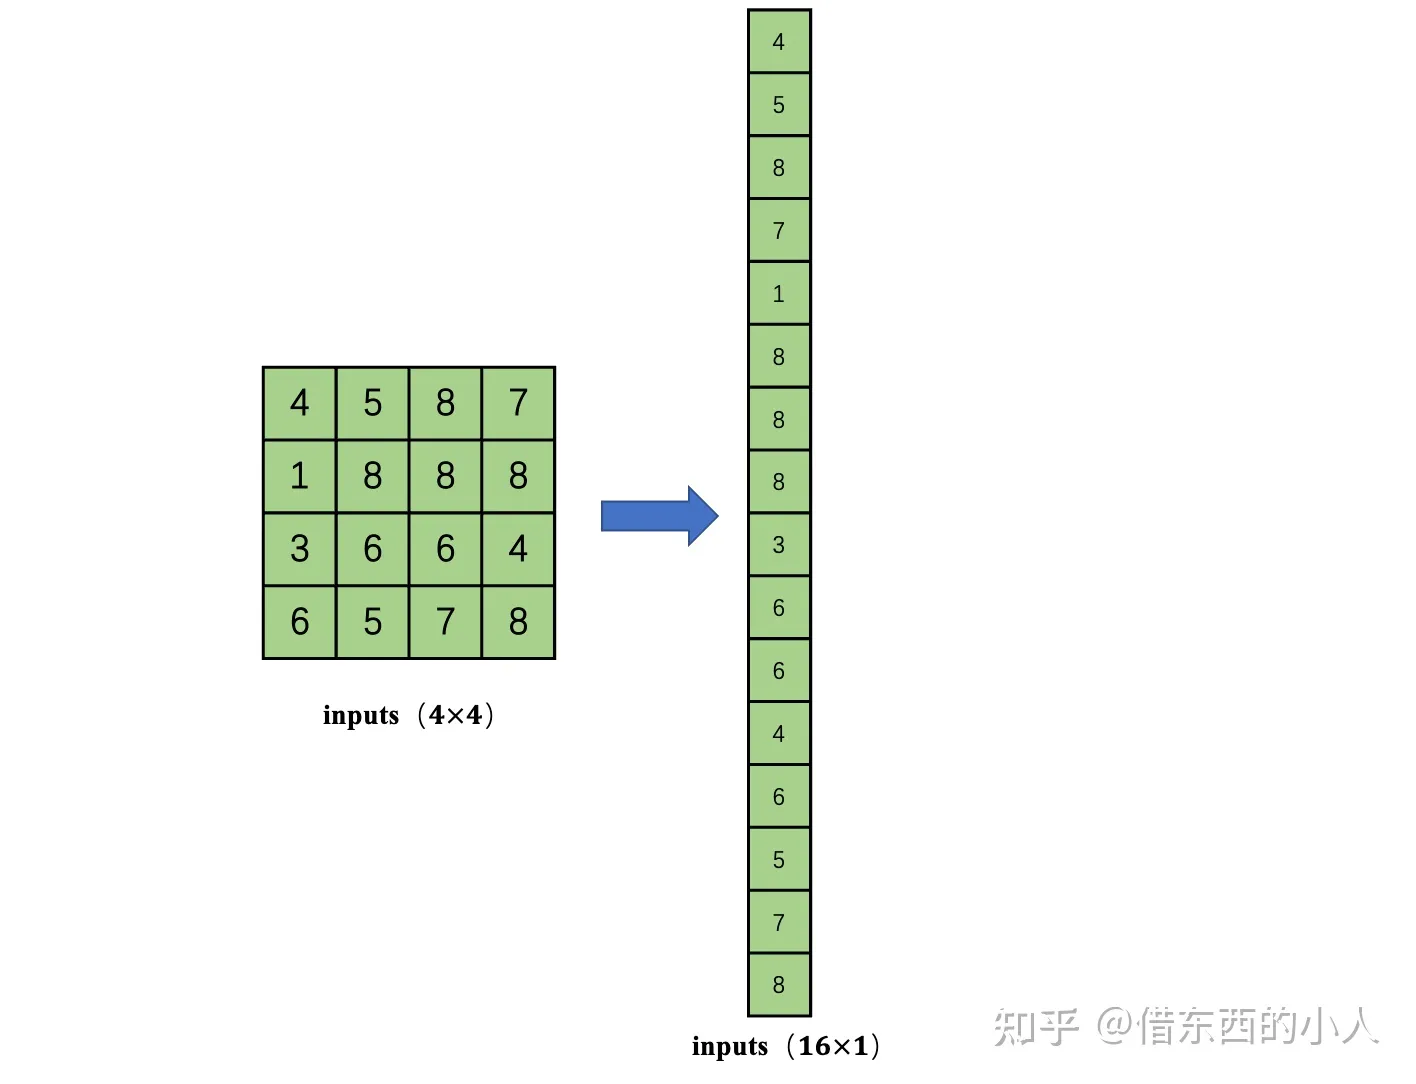
- ### 同时，将卷积核也按行展开，与输入特征图没有作用的位置用0填充：
  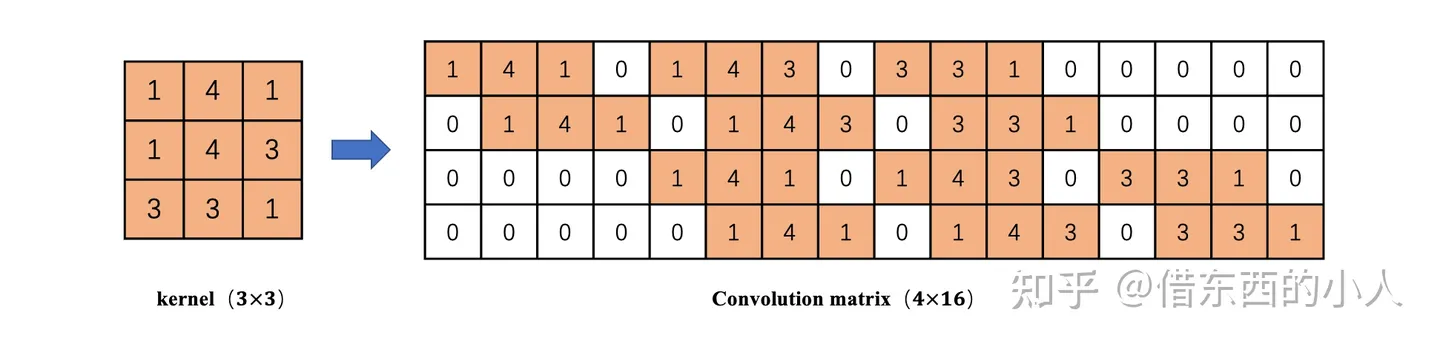
- ### 卷积可以实现为如下效果：
  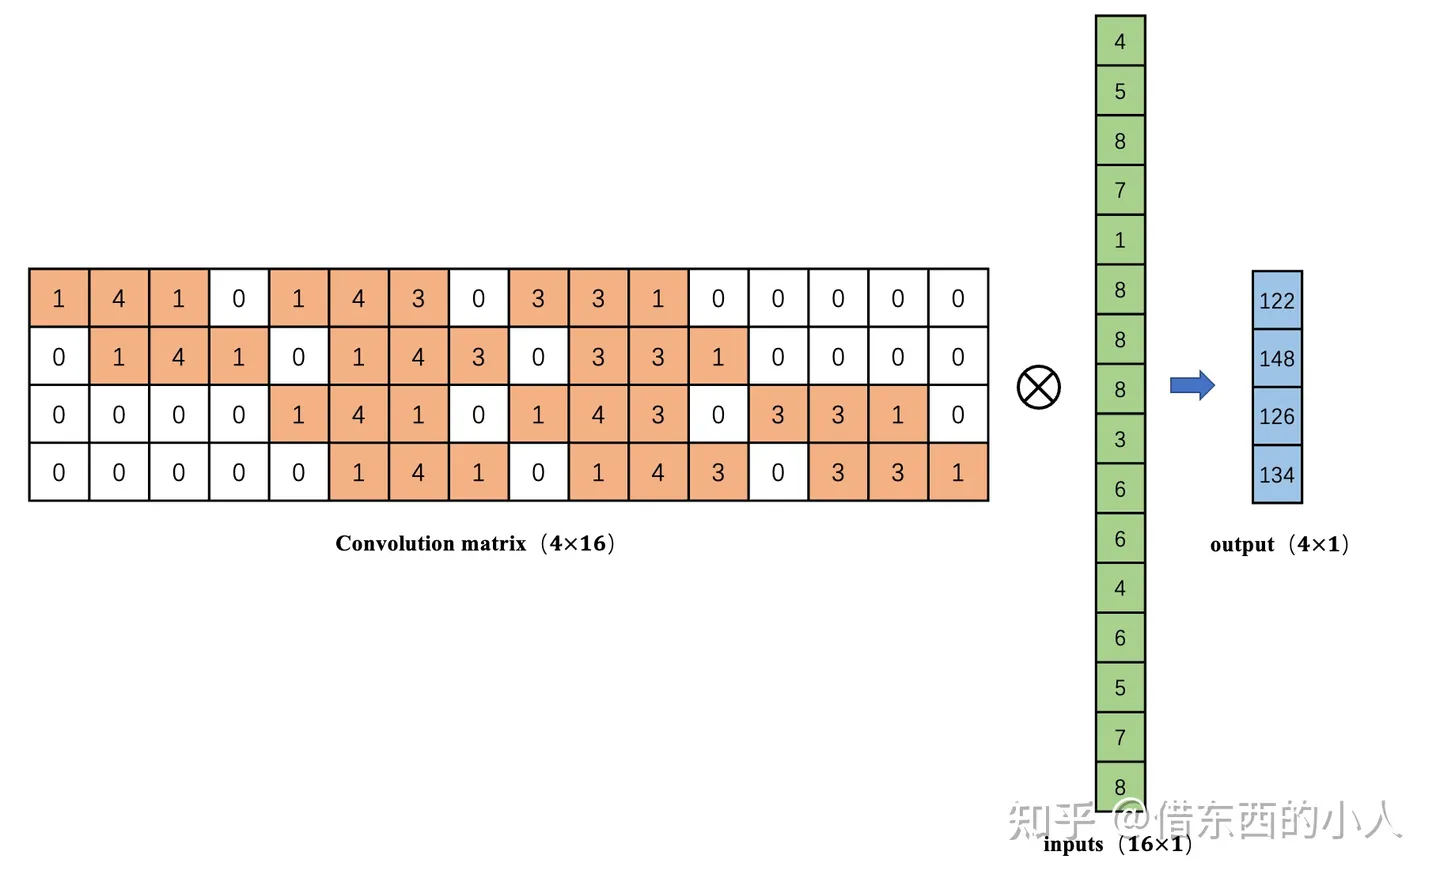

## 转置卷积实现
卷积操作可以将16维的向量通过矩阵乘法输出一个4维的向量，将一个4维的向量通过转置卷积就能够得到一个16维的向量
- ### 对卷积矩阵求转置，再去计算矩阵相乘，这样就可以从输出特征图计算得到更高分辨率的输入特征图。这也就是转置卷积的由来……
  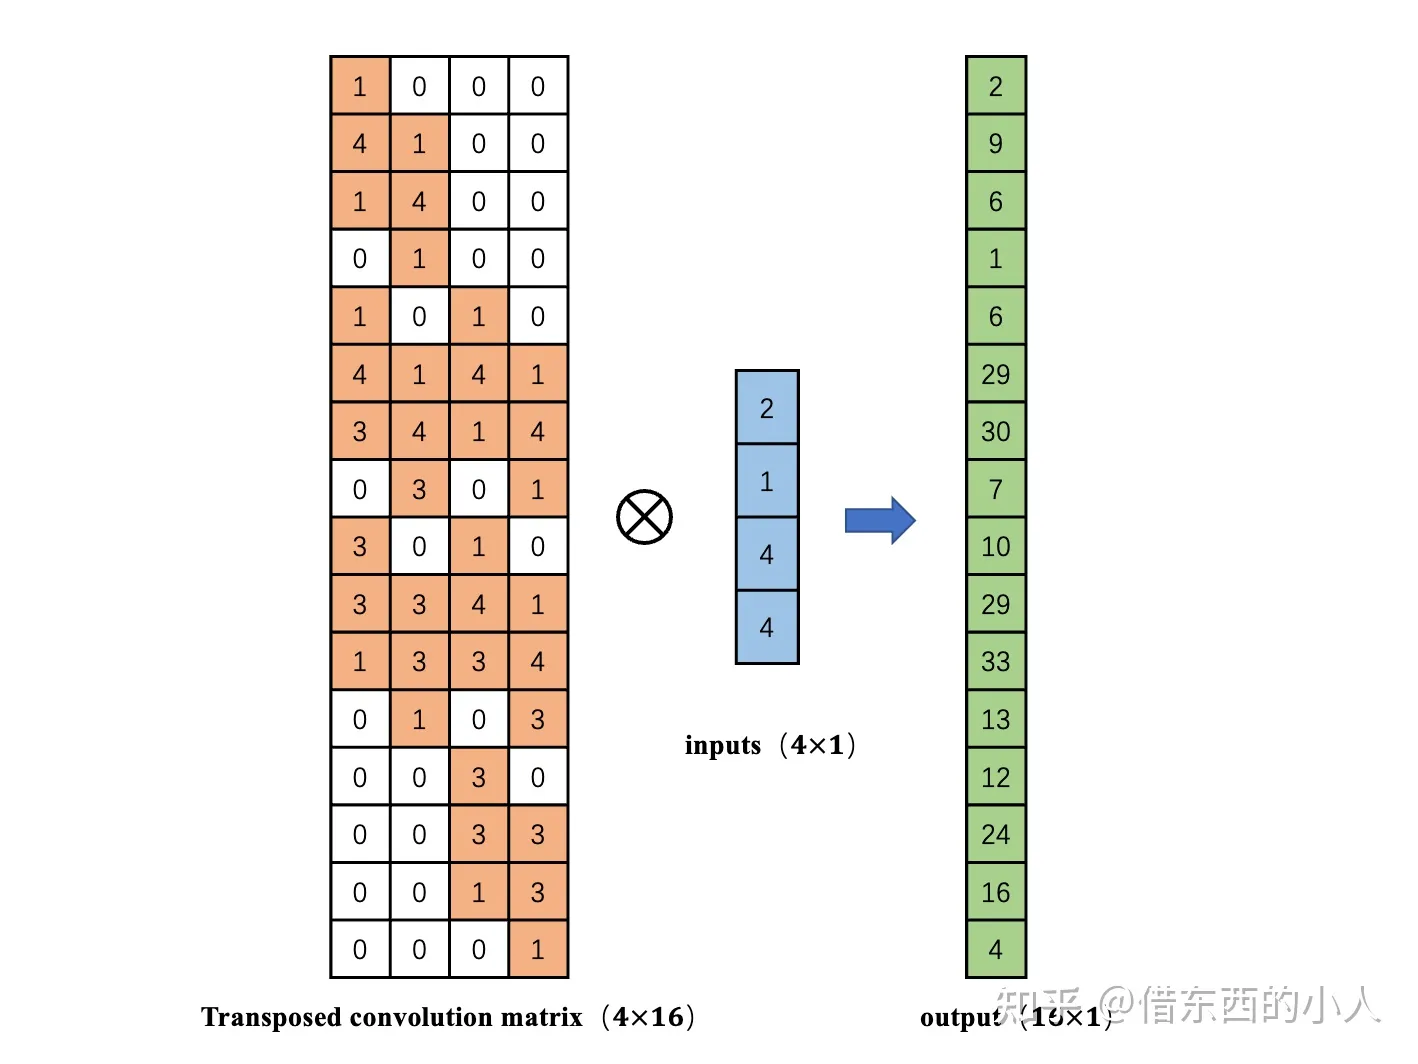

***注意⚠️***

- 1. 转置卷积矩阵并不是卷积矩阵数值上的转置，而只是一个结构化的矩阵；
- 2. 通俗地讲，就是根据转置矩阵我们只能得到哪些位置的像素值应该是0，每个数值对应卷积核哪个位置的值，而这些数值要根据网络学习得到，而不是单纯的转置或逆；
- 3. 这也是为什么有些人不赞同转置卷积被称为反卷积的原因；